<a href="https://colab.research.google.com/github/NishatVasker/CSE488_Big-Data-Analytics-/blob/main/Deep_Learning_last_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


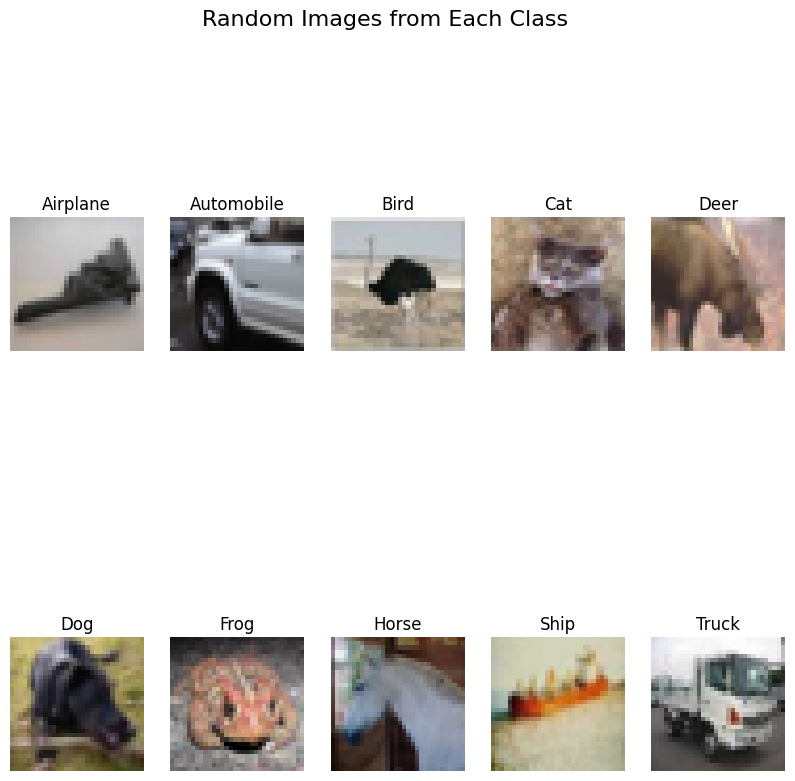

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Show random images from all classes
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = random.choice(np.where(y_train.flatten() == i)[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Random Images from Each Class', fontsize=16)
plt.show()

In [2]:
# Neural Network (NN) model
nn_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile NN model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train NN model
nn_history = nn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.2609 - loss: 2.0522 - val_accuracy: 0.3470 - val_loss: 1.7901
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.3786 - loss: 1.7279 - val_accuracy: 0.3836 - val_loss: 1.7059
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.4137 - loss: 1.6254 - val_accuracy: 0.4168 - val_loss: 1.6121
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.4398 - loss: 1.5584 - val_accuracy: 0.4419 - val_loss: 1.5877
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.4590 - loss: 1.5109 - val_accuracy: 0.4548 - val_loss: 1.5353
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.4654 - loss: 1.4886 - val_accuracy: 0.4569 - val_loss: 1.5509
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4829 - loss: 1.4466 - val_accuracy: 0.4444 - val_loss: 1.5554
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.4940 - loss: 1.4197 - 

In [3]:
# CNN model
cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 99ms/step - accuracy: 0.3045 - loss: 1.8623 - val_accuracy: 0.4593 - val_loss: 1.4679
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.5129 - loss: 1.3420 - val_accuracy: 0.5631 - val_loss: 1.2375
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.5885 - loss: 1.1607 - val_accuracy: 0.6033 - val_loss: 1.1154
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.6321 - loss: 1.0368 - val_accuracy: 0.6403 - val_loss: 1.0305
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.6696 - loss: 0.9535 - val_accuracy: 0.6504 - val_loss: 0.9937
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.6814 - loss: 0.8978 - val_accuracy: 0.6566 - val_loss: 1.0033
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.7052 - loss: 0.8401 - val_accuracy: 0.6853 - val_loss: 0.9094
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.7203 - loss: 0.79

313/313 - 2s - 6ms/step - accuracy: 0.4828 - loss: 1.4647
313/313 - 4s - 12ms/step - accuracy: 0.6910 - loss: 0.8906

Neural Network Test Accuracy: 0.4828000068664551
Convolutional Neural Network Test Accuracy: 0.6909999847412109


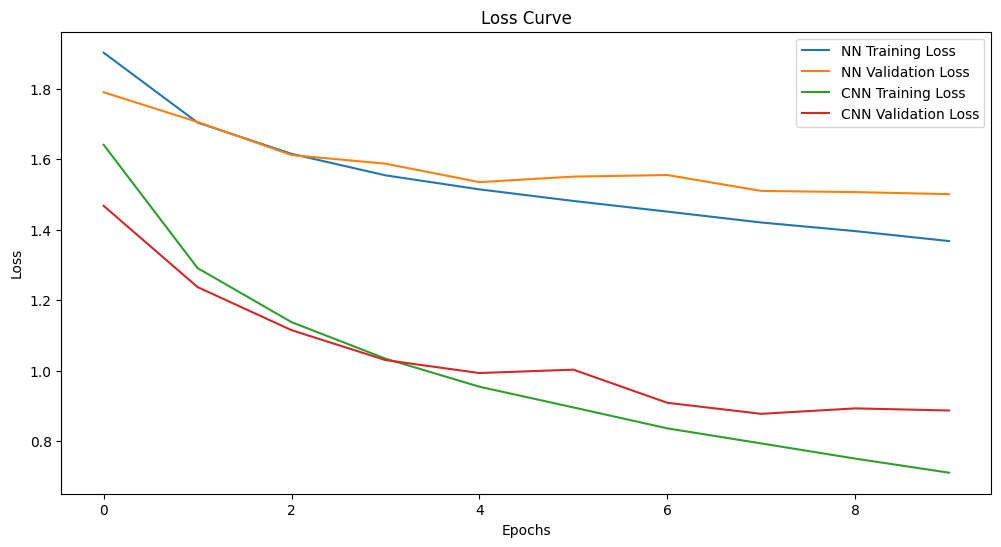

In [4]:
# Evaluate both models
nn_test_loss, nn_test_acc = nn_model.evaluate(x_test, y_test_cat, verbose=2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=2)

print("\nNeural Network Test Accuracy:", nn_test_acc)
print("Convolutional Neural Network Test Accuracy:", cnn_test_acc)

# Plot loss curve for both models
plt.figure(figsize=(12, 6))
plt.plot(nn_history.history['loss'], label='NN Training Loss')
plt.plot(nn_history.history['val_loss'], label='NN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
# Display model summaries
print("\nNeural Network Model Summary:")
nn_model.summary()

print("\nConvolutional Neural Network Model Summary:")
cnn_model.summary()


Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)


Convolutional Neural Network Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


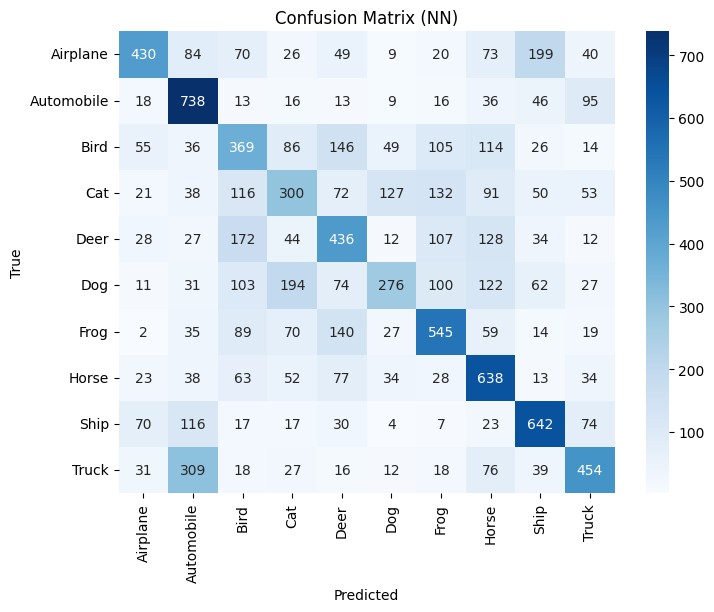


Classification Report (NN):
               precision    recall  f1-score   support

    Airplane       0.62      0.43      0.51      1000
  Automobile       0.51      0.74      0.60      1000
        Bird       0.36      0.37      0.36      1000
         Cat       0.36      0.30      0.33      1000
        Deer       0.41      0.44      0.42      1000
         Dog       0.49      0.28      0.35      1000
        Frog       0.51      0.55      0.52      1000
       Horse       0.47      0.64      0.54      1000
        Ship       0.57      0.64      0.60      1000
       Truck       0.55      0.45      0.50      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [6]:
# Show confusion matrix and classification report for NN
y_pred_nn = np.argmax(nn_model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (NN)')
plt.show()

report = classification_report(y_true, y_pred_nn, target_names=class_names)
print("\nClassification Report (NN):\n", report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


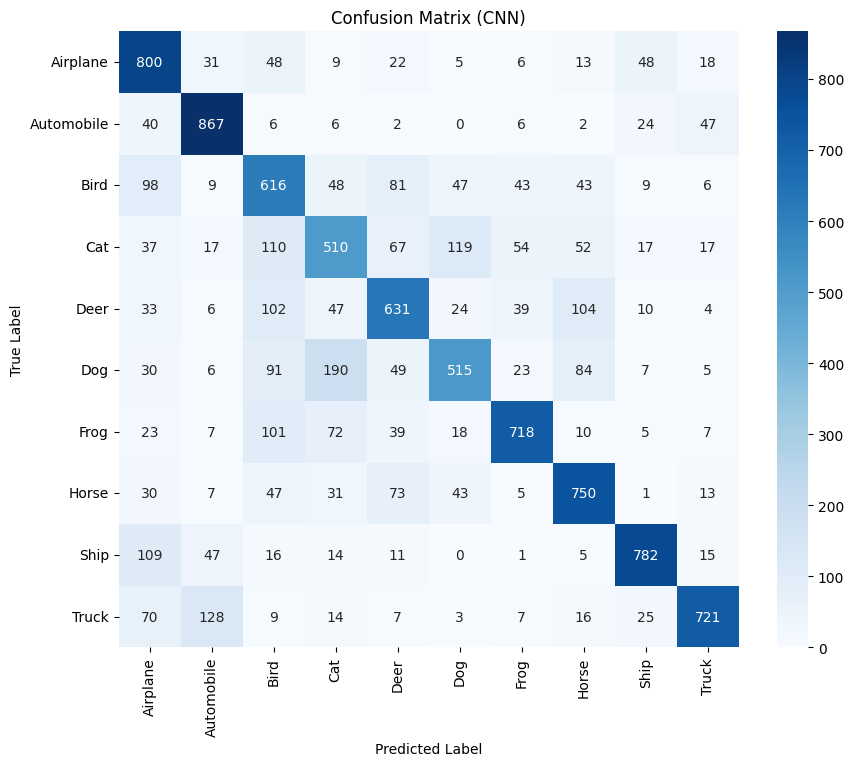


Classification Report (CNN):
               precision    recall  f1-score   support

    Airplane       0.63      0.80      0.70      1000
  Automobile       0.77      0.87      0.82      1000
        Bird       0.54      0.62      0.57      1000
         Cat       0.54      0.51      0.53      1000
        Deer       0.64      0.63      0.64      1000
         Dog       0.67      0.52      0.58      1000
        Frog       0.80      0.72      0.75      1000
       Horse       0.70      0.75      0.72      1000
        Ship       0.84      0.78      0.81      1000
       Truck       0.85      0.72      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [7]:
# Show confusion matrix and classification report for CNN
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (CNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_true, y_pred_cnn, target_names=class_names)
print("\nClassification Report (CNN):\n", report)

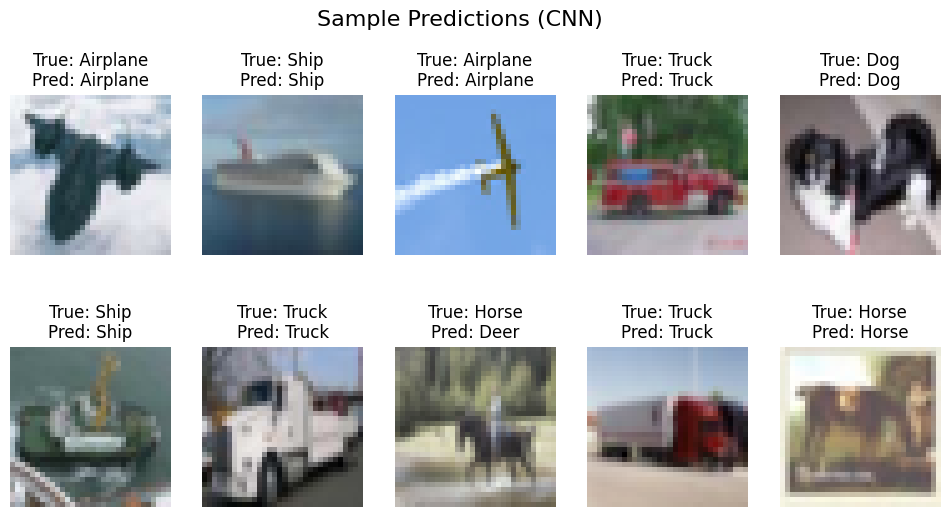

In [8]:
# Show a few predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = random.randint(0, len(x_test) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx][0]]}\nPred: {class_names[y_pred_cnn[idx]]}")
    plt.axis('off')
plt.suptitle('Sample Predictions (CNN)', fontsize=16)
plt.show()

# **Group-wise Tasks**
*You must not change the basic structure of the given code.*

**Task 1**: Modify the CNN architecture (e.g., add more Convolution/Pooling/Dense/dropout/Batch Normalization layers, change kernel sizes) and report the performance impact. (Modified Architecture should provide a better performance, Benchmark Performance - CNN Test Accuracy: 0.6873999834060669)

**Task 2**: Use FASHION-MNIST Dataset and Report the performance of your CNN model (Test Accuracy) built for Task 1. You may use padding in the first convolution layer to get the appropriate output shape.

**Task 3**: Can you improve the performace of your CNN Model used for Task 2? If yes, what have you changed? Report the test accuracy.

**Task 4**: Apply a pre-trained model over FASHION-MNIST Dataset and compare the performance of your CNN model and the pre-trained model.  

**Show your obtained result during the lab and submit a formal report on these tasks after the lab.**



In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
)

# Optimized CNN architecture
def create_optimized_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(GlobalAveragePooling2D())  # Reduces dimensions while retaining spatial information
    model.add(Dropout(0.4))

    # Fully connected layer
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Instantiate and compile the model
model = create_optimized_cnn()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print summary of the optimized model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,5

 Total params: 324,522 (1.24 MB)

 Trainable params: 323,562 (1.23 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add a channel dimension (grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Train data shape: {x_train.shape}, Test data shape: {x_test.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train data shape: (60000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model for Fashion-MNIST
def create_fashion_mnist_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Instantiate the model
model = create_fashion_mnist_cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 392,330 (1.50 MB)

 Trainable params: 391,370 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                    ])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Fashion-MNIST Test Accuracy: {test_accuracy}")


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 177s 183ms/step - accuracy: 0.7147 - loss: 0.8520 - val_accuracy: 0.8617 - val_loss: 0.3685
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 205s 186ms/step - accuracy: 0.8482 - loss: 0.4064 - val_accuracy: 0.8579 - val_loss: 0.3628
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 175s 186ms/step - accuracy: 0.8714 - loss: 0.3492 - val_accuracy: 0.8897 - val_loss: 0.3002
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 175s 186ms/step - accuracy: 0.8850 - loss: 0.3116 - val_accuracy: 0.8742 - val_loss: 0.3387
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 200s 184ms/step - accuracy: 0.8889 - loss: 0.2976 - val_accuracy: 0.9092 - val_loss: 0.2479
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 201s 183ms/step - accuracy: 0.8983 - loss: 0.2786 - val_accuracy: 0.9082 - val_loss: 0.2517
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 205s 187ms/step - accuracy: 0.9008 - loss: 0.2683 - val_accuracy: 0.9135 - val_loss: 0.2368
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 199s 184ms/step - accuracy: 0.9074 -

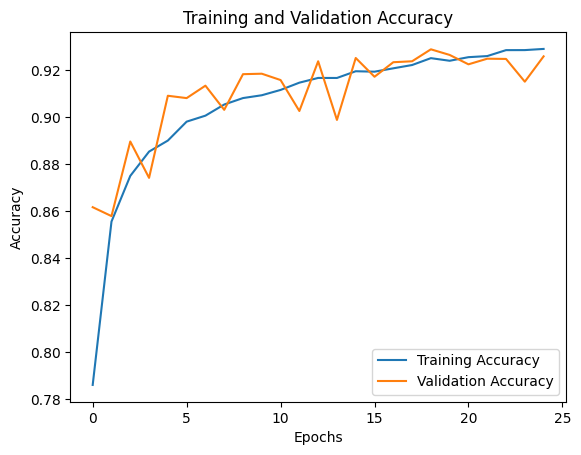

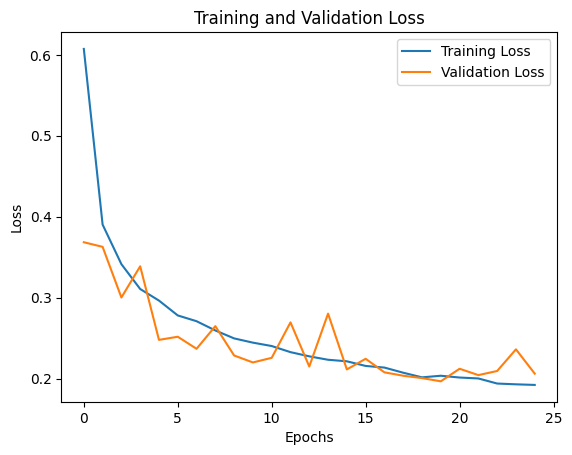

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
